## 爬虫准备工作
- 参考资料
    - Python网络数据采集·图灵出版社
    - 精通Python爬虫框架Scrapy·人民邮电出版社
    - Python爬虫开发与项目实战，范传辉，机械工业出版社
    - 精通python爬虫框架scrapy，李斌 翻译，人民邮电出版社
    - 崔庆才，
    - [Python3网络爬虫](http://blog.csdn.net/c406495762/article/details/72858983)
- 前提知识
    - url
    - http
    - web,html,css,js
    - ajax
    - re,xpath
    - xml
- 爬虫分类
    - 通用爬虫
    - 精通爬虫
- 网络包简介(Python3):
    - urllib,urllib3,httplib2,requests

## urllib
- 包含模块
    - urllib.request:打开和读取urls
    - urllib.error:包含urllib.request产生的常见的错误，使用try捕捉
    - urllib.parse:包含解析url的方法
    - urllib.robotparse:解析robots.txt文件

In [1]:
from urllib import request,parse,error
from io import BytesIO
import gzip
import requests

#### 爬取加解码

In [48]:
url='http://music.baidu.com'

In [49]:
rsp = request.urlopen(url)
htmls = rsp.read()
buff = BytesIO(htmls)
f = gzip.GzipFile(fileobj=buff)
html = f.read().decode('utf-8')

In [33]:
r=requests.get(url)
r.encoding='utf-8'
html = r.text

<!doctype html>
<!--[if lt IE  10]><html lang="en-US" class="lt-ie9 ie9" data-n-head-ssr>
<div style="text-align:center;height:40px;line-height:40px;background:#fdf6ec;color:#e6a23c">您正在使用的浏览器版本过低，为了您的最佳体验，请先升级浏览器。</div>
<![endif]-->
<!--[if (gt IE 9)|!(IE)]><!-->
<html data-n-head-ssr>
<!--<![endif]-->

<head >
  <title>千千音乐-听见世界</title><meta data-n-head="ssr" charset="utf-8"><meta data-n-head="ssr" data-hid="viewport" name="viewport" content="width=device-width, initial-scale=1, minimal-ui, viewport-fit=cover"><meta data-n-head="ssr" name="keywords" content="千千音乐"><meta data-n-head="ssr" data-hid="description" name="description" content="千千音乐致力于提供更专业、更懂你的「场景音乐」，打造一款个性化、智能化的音乐伴侣产品，让你感受音乐本身的魅力。这里有来自不同国家的数百名音乐设计师，为你提供更好的音乐服务。"><link data-n-head="ssr" rel="icon" type="image/x-icon" href="/favicon.ico"><link rel="preload" href="https://static1-music.taihe.com/client/186132c8eea53de4a753.js" as="script"><link rel="preload" href="https://static1-music.taihe.com/client/72f544b7b5687ca8e8e1.j

#### 判断编码格式

In [59]:
import chardet
url = 'http://blog.sina.com.cn/s/blog_162407e210102yoru.html'
rsp = request.urlopen(url)
htmls = rsp.read()
print(chardet.detect(htmls))

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


#### urlopen的返回的对象
- geturl:返回请求对象的url
- info:请求反馈对象的meta信息
- getcode:返回的http code

In [61]:
print("URL: {0}".format(rsp.geturl()))
print("Info: {0}".format(rsp.info()))
print("Code: {0}".format(rsp.getcode()))

URL: http://blog.sina.com.cn/s/blog_162407e210102yoru.html
Info: Server: nginx/1.2.8
Date: Sat, 12 Sep 2020 09:15:38 GMT
Content-Type: text/html
Content-Length: 35586
Connection: close
Vary: Accept-Encoding
P3P: CP="CURa ADMa DEVa PSAo PSDo OUR BUS UNI PUR INT DEM STA PRE COM NAV OTC NOI DSP COR"
Cache-Control: no-cache
Expires: Sat, 12 Sep 2020 09:15:37 GMT
Last-Modified: Thu, 10 Sep 2020 08:19:30 GMT+8
DPOOL_HEADER: 10.68.14.65
Age: 204968
X-Cache: HIT from blog-front006.blog.sx.sinanode.com
Cache-Control: 


Code: 200


### request.data的使用
- 访问网络的方法
    - get
        - 利用参数给服务器传递信息
        - 参数为dict，然后用parse编码
    - post
        - 一般向服务器传递参数使用
        - 把信息自动加密处理
        - 需要用到data参数
        - 可能更改请求头:
            - Content-Type: application/x-www.form-urlencode
            - Content-Length: 数据长度

In [3]:
from urllib import request,parse

In [78]:
#GET
url = "https://www.baidu.com/s?"
wd = input("Input your keyword:")
qs = {"wd":wd}
qs = parse.urlencode(qs)

fullurl = url+qs
print(fullurl)

Input your keyword:python
https://www.baidu.com/s?wd=python


In [5]:
#POST
import json
import ssl

baseurl = "https://fanyi.baidu.com/sug"
kw = input("Input your keyword:")
data = {
    "kw":kw
}
data = parse.urlencode(data).encode("utf-8")

#请求头至少数据的长度
headers = {
    "Content-Length":len(data)
}

req = request.Request(url=baseurl,data=data,headers=headers)
rsp = request.urlopen(req)
json_data = rsp.read().decode("utf-8")

print(json.loads(json_data))

Input your keyword:python
{'errno': 0, 'data': [{'k': 'python', 'v': 'n. 蟒; 蚺蛇;'}, {'k': 'pythons', 'v': 'n. 蟒; 蚺蛇;  python的复数;'}]}


### urllib.error使用

In [9]:
from urllib import error

#url = "http://www.baiidu.com"
url = "http://www.sipo.gov.cn/www"

try:
    req = request.Request(url)
    rsp = request.urlopen(req)
    html = rsp.read().decode()
except error.HTTPError as e:
    print("HTTPError: {0}".format(e.reason))
    print("HTTPError: {0}".format(e))
except error.URLError as e:
    print("URLError: {0}".format(e.reason))
    print("URLError: {0}".format(e))
except Exception as e:
    print(e)

HTTPError: Forbidden
HTTPError: HTTP Error 403: Forbidden


### userAgent
- 用户代理，简称UA，属于headers的一部分，服务器通过UA来判断访问者身份

<center>======PC端=======</center>

- Chrome
     - Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.71 Safari/537.36
     - Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11
     - Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Chrome/10.0.648.133 Safari/534.16

- Firefox
     - Mozilla/5.0 (Windows NT 6.1; WOW64; rv:34.0) Gecko/20100101 Firefox/34.0
     - Mozilla/5.0 (X11; U; Linux x86_64; zh-CN; rv:1.9.2.10) Gecko/20100922 Ubuntu/10.10 (maverick) Firefox/3.6.10

- Opera
     - Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36 OPR/26.0.1656.60
     - Opera/8.0 (Windows NT 5.1; U; en)
     - Mozilla/5.0 (Windows NT 5.1; U; en; rv:1.8.1) Gecko/20061208 Firefox/2.0.0 Opera 9.50
     - Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.1; en) Opera 9.50

- Safari
     - Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/534.57.2 (KHTML, like Gecko) Version/5.1.7 Safari/534.57.2

- 360
     - Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/30.0.1599.101 Safari/537.36
     - Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7.0; rv:11.0) like Gecko

- QQ浏览器
     - Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; WOW64; Trident/5.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR3.0.30729; Media Center PC 6.0; .NET4.0C; .NET4.0E; QQBrowser/7.0.3698.400)
     - Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.1; SV1; QQDownload 732; .NET4.0C; .NET4.0E)

- sogou浏览器
     - Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.84 Safari/535.11 SE 2.X MetaSr 1.0
     - Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1; Trident/4.0; SV1; QQDownload 732; .NET4.0C; .NET4.0E; SE 2.X MetaSr 1.0)

- UC浏览器
     - Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/38.0.2125.122 UBrowser/4.0.3214.0 Safari/537.36

<br/>
<center>======移动端=======</center>

- IPhone
     - Mozilla/5.0 (iPhone; U; CPU iPhone OS 4_3_3 like Mac OS X; en-us) AppleWebKit/533.17.9 (KHTML, like Gecko) Version/5.0.2 Mobile/8J2      - Safari/6533.18.5

- IPAD
     - Mozilla/5.0 (iPad; U; CPU OS 4_2_1 like Mac OS X; zh-cn) AppleWebKit/533.17.9 (KHTML, like Gecko) Version/5.0.2 Mobile/8C148 Safari/6533.18.5
     - Mozilla/5.0 (iPad; U; CPU OS 4_3_3 like Mac OS X; en-us) AppleWebKit/533.17.9 (KHTML, like Gecko) Version/5.0.2 Mobile/8J2 Safari/6533.18.5

- Android
     - Mozilla/5.0 (Linux; U; Android 2.2.1; zh-cn; HTC_Wildfire_A3333 Build/FRG83D) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1
     - Mozilla/5.0 (Linux; U; Android 2.3.7; en-us; Nexus One Build/FRF91) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1

- QQ浏览器 Android版本
     - MQQBrowser/26 Mozilla/5.0 (Linux; U; Android 2.3.7; zh-cn; MB200 Build/GRJ22; CyanogenMod-7) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1

- Android Opera Mobile
     - Opera/9.80 (Android 2.3.4; Linux; Opera Mobi/build-1107180945; U; en-GB) Presto/2.8.149 Version/11.10

- Android Pad Moto Xoom
     - Mozilla/5.0 (Linux; U; Android 3.0; en-us; Xoom Build/HRI39) AppleWebKit/534.13 (KHTML, like Gecko) Version/4.0 Safari/534.13
     
     
<center>[禁止转载](https://blog.csdn.net/qq_40147863/article/details/81710220)</center>

- Myself
    - Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36

In [14]:
from urllib import  request,error

url = "https://www.bilibili.com/"

try:
    # headers = {}
    # headers['User-Agent'] = 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36'
    # req = request.Request(url, headers=headers)

    req = request.Request(url)
    req.add_header("User-Agent","Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36")

    rsp = request.urlopen(req)
    html = rsp.read().decode()

except error.HTTPError as e:
    print(e)
except error.URLError as e:
    print(e)
except Exception as e:
    print(e)

### ProxyHandler处理(代理服务器)
    - 代理服务器地址
        - www.goubanjia.com
    - 基本使用步骤
        1.设置代理地址
        2.创建ProxyHandler
        3.创建Opener
        4.安装Opener

In [4]:
from urllib import  request,error

url = "http://www.baidu.com/"

proxy = {"http":"58.220.95.34:10174"}
proxy_handler = request.ProxyHandler(proxy)
opener = request.build_opener(proxy_handler)
request.install_opener(opener)

try:
    rsp = request.urlopen(url)
    html = rsp.read().decode()

except error.HTTPError as e:
    print(e)
except error.URLError as e:
    print(e)
except Exception as e:
    print(e)

### Cookie
- http模块包含cookie的模块
    - CookieJar
        - 管理储存cookie，向传出的http请求添加cookie
        - cookie储存在内存中，CookieJar实例回收后cookie消失
    - FileCookieJar(filename,delayload=None,policy=None)
        - 使用文件管理cookie
    - MozillaCookieJar(filename,delayload=None,policy=None)
        - 创建与mocilla浏览器cookie.txt兼容的FileCookieJar实例
    - LwpCookieJar(filename,delayload=None,policy=None)
        - 创建与Libwww-perl标准兼容的Set-Cookie3格式的FileCookieJar实例
    - 关系:CookieJar-->FileCookieJar-->MozillaCookieJar&LwpCookieJar

In [21]:
from urllib import  request,error

url = "http://i.baidu.com/"

try:
    headers = {
        "Cookie":"BAIDUID=269467C517506568F1EB8471BC013FF5:FG=1; PSTM=1587206284; BIDUPSID=B77E3BF3BF0832D81B534D3A7672F785; BDUSS=xqZWZqQllPfm9hNnBQOG82SnJ-U0tzbDdFMTNRVTJuTzA3aW9IeWYzeWNxWUZmSVFBQUFBJCQAAAAAAAAAAAEAAAAjxLoXQWNobGllcgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJwcWl-cHFpfLW; BDORZ=B490B5EBF6F3CD402E515D22BCDA1598; yjs_js_security_passport=be578ea6df6cc77bfb64414650f2c877c4638a07_1599914002_js; delPer=0; PSINO=5; H_PS_PSSID=7541_32617_1435_7567_7543_31660_32270_7623_32117_32691_26350; PHPSESSID=ia0lpirtb640fhj14iknfelie0; __guid=62687476.2614622680945393000.1599994297150.331; monitor_count=1; Hm_lvt_4010fd5075fcfe46a16ec4cb65e02f04=1599994298; Hm_lpvt_4010fd5075fcfe46a16ec4cb65e02f04=1599994298",
        "User-Agent":"Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36"
    }

    req = request.Request(url=url,headers=headers)
    rsp = request.urlopen(req)
    html = rsp.read().decode("utf-8")
    
    with open("rsp.html","w") as f:
        f.write(html)
    f.close()
    
except error.HTTPError as e:
    print(e)
except error.URLError as e:
    print(e)
except Exception as e:
    print(e)

In [13]:
from urllib import  request,parse,error
from http import cookiejar

cookie = cookiejar.CookieJar()
cookie_handler = request.HTTPCookieProcessor(cookie)
http_handler = request.HTTPHandler()
https_handler = request.HTTPSHandler()
opener = request.build_opener(http_handler,https_handler,cookie_handler)


def login():
    url = "http://www.renren.com/PLogin.do"

    data = {
        "email":"353975811@qq.com",
        "password":"a353975811"
    }
    data = parse.urlencode(data).encode("utf-8")
    try:
        req = request.Request(url=url,data=data)
        rsp = opener.open(req)

    except error.HTTPError as e:
        print(e)
    except error.URLError as e:
        print(e)
    except Exception as e:
        print(e)

def getHomePage():
    url = "http://www.renren.com/975115521/profile"

    try:
        rsp = opener.open(url)
        html = rsp.read().decode("utf-8")

        with open("rsp.html","w", encoding="utf-8") as f:
            f.write(html)
        f.close()

    except error.HTTPError as e:
        print(e)
    except error.URLError as e:
        print(e)
    except Exception as e:
        print(e)

In [14]:
login()
getHomePage()

In [25]:
from urllib import  request,parse,error
from http import cookiejar

filename = "cookie.txt"
cookie = cookiejar.MozillaCookieJar(filename)
cookie_handler = request.HTTPCookieProcessor(cookie)
http_handler = request.HTTPHandler()
https_handler = request.HTTPSHandler()
opener = request.build_opener(http_handler,https_handler,cookie_handler)


def save():
    url = "http://www.renren.com/PLogin.do"

    data = {
        "email":"353975811@qq.com",
        "password":"a353975811"
    }
    data = parse.urlencode(data).encode("utf-8")
    try:
        req = request.Request(url=url,data=data)
        rsp = opener.open(req)
        
        cookie.save()
    except error.HTTPError as e:
        print(e)
    except error.URLError as e:
        print(e)
    except Exception as e:
        print(e)
def load():
    cookie = cookiejar.MozillaCookieJar()
    cookie.load("cookie.txt")
    for item in cookie:
        print(item)

In [26]:
save()
load()

<Cookie _de=FBD9EC45A0B58920247380B22A94C474696BF75400CE19CC for .renren.com/>
<Cookie anonymid=kf16wb78sud7ri for .renren.com/>
<Cookie ln_hurl=http://hdn.xnimg.cn/photos/hdn421/20200913/2140/h_main_P8I6_5390000c41f71986.jpg for .renren.com/>
<Cookie ln_uact=353975811@qq.com for .renren.com/>


#### cookie的属性
- name:名称
- value:值
- domain:域名
- path:页面路径
- expires:过期时间
- size:大小
- Http字段

### SSL接除警告

In [27]:
import ssl

#非认证替换认证
#ssl._create_default_https_context = ssl._create_unverified_context
url = "https://www.12306.cn/"#已有证书了,需要换例子
rsp = request.urlopen(url)

html = rsp.read().decode()

### JS加密

In [2]:
import hashlib
def getMD5(v):
    md5 = hashlib.md5()
    md5.update(v.encode("utf-8"))
    sign = md5.hexdigest()
    return sign
def getSign(key,salt):
    kw = "fanyideskweb" + key + salt + "]BjuETDhU)zqSxf-=B#7m"
    return getMD5(kw)

# import js2py
# context = js2py.EvalJs()
# js_str = """r = "" + (new Date).getTime()
#           , i = r + parseInt(10 * Math.random(), 10);"""
# context.execute(js_str)
# ts = context.r
# salt = context.i

In [66]:
import json
import time,random

def youdao(key):
    
    ts = str(int(time.time()*1000))
    salt = ts + str(random.randint(0,9))
    
    url = "http://fanyi.youdao.com/translate?smartresult=dict&smartresult=rule"
    
    data = {
        "i": key,
        "from": "AUTO",
        "to": "AUTO",
        "smartresult": "dict",
        "salt": salt,
        "sign": getSign(key,salt),
        "lts": ts,
        "bv": "cc652a2ad669c22da983a705e3bca726",
        "doctype": "json",
        "version": "2.1",
        "keyfrom": "fanyi.web",
        "action": "FY_BY_REALTlME"
    }
    
    data = parse.urlencode(data).encode("utf-8")
    
    headers = {
        "Accept": "application/json, text/javascript, */*; q=0.01",
#        "Accept-Encoding": "gzip, deflate",
        "Accept-Language": "zh-CN,zh;q=0.9",
        "Connection": "keep-alive",
        "Content-Length": str(len(data)),
        "Content-Type": "application/x-www-form-urlencoded; charset=UTF-8",
        "Cookie": "OUTFOX_SEARCH_USER_ID=1524575430@119.123.44.130; _ntes_nnid=58604ba1705819ef9485d815e42d1c10,1595672726898; OUTFOX_SEARCH_USER_ID_NCOO=175254787.25985897; __guid=204659719.2948708863687797000.1596918901548.6138; DICT_UGC=be3af0da19b5c5e6aa4e17bd8d90b28a|; JSESSIONID=abcrEnQtww8mL9kuaGlsx; monitor_count=3; ___rl__test__cookies=1600083934571",
        "Host": "fanyi.youdao.com",
        "Origin": "http://fanyi.youdao.com",
        "Referer": "http://fanyi.youdao.com/",
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36",
        "X-Requested-With": "XMLHttpRequest"
    }
    
    html = requests.post(url=url,data=data,headers=headers).json()
    
    print(html)

In [67]:
youdao("Hello")

{'type': 'EN2ZH_CN', 'errorCode': 0, 'elapsedTime': 1, 'translateResult': [[{'src': 'Hello', 'tgt': '你好'}]]}


### ajax(滚轮)

In [71]:
import json

url = "https://movie.douban.com/j/chart/top_list?type=11&interval_id=100%3A90&action=&start=40&limit=20"


headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36",
}

req = request.Request(url=url,headers=headers)
rsp = request.urlopen(req)
data = rsp.read().decode()
data = json.loads(data)

In [72]:
data

[{'rating': ['9.2', '45'],
  'rank': 41,
  'cover_url': 'https://img2.doubanio.com/view/photo/s_ratio_poster/public/p462657443.jpg',
  'is_playable': True,
  'id': '1851857',
  'types': ['剧情', '动作', '科幻', '犯罪', '惊悚'],
  'regions': ['美国', '英国'],
  'title': '蝙蝠侠：黑暗骑士',
  'url': 'https://movie.douban.com/subject/1851857/',
  'release_date': '2008-07-14',
  'actor_count': 39,
  'vote_count': 777265,
  'score': '9.2',
  'actors': ['克里斯蒂安·贝尔',
   '希斯·莱杰',
   '艾伦·艾克哈特',
   '迈克尔·凯恩',
   '玛吉·吉伦哈尔',
   '加里·奥德曼',
   '摩根·弗里曼',
   '莫尼克·加布里埃拉·库尔内',
   '罗恩·迪恩',
   '基里安·墨菲',
   '黄经汉',
   '内斯特·卡博内尔',
   '埃里克·罗伯茨',
   '里特奇·科斯特',
   '安东尼·迈克尔·豪尔',
   '基斯·斯扎拉巴基克',
   '柯林·麦克法兰',
   '约书亚·哈尔托',
   '美琳达·麦格劳',
   '内森·甘宝',
   '迈克尔·维约',
   '迈克尔·斯托扬诺夫',
   '威廉·斯米利',
   '丹尼·高德林',
   '迈克尔·加·怀特',
   '马修·奥尼尔',
   '威廉·菲克纳',
   '欧鲁米基·欧拉乌米',
   '格雷格·比姆',
   '爱利克·赫尔曼',
   '毕崔斯·罗森',
   '文森佐·尼克力',
   '陈冠希',
   '罗南·萨莫尔斯',
   '玛丽扎·卡布蕾拉',
   '大卫·达斯马齐连',
   '理查德·迪兰',
   '利萨·麦克阿里斯特',
   'Adam Kalesperis'],
  'is_watched': False}

### Requests
- https://requests.readthedocs.io/en/master/

In [73]:
import requests

url = "http://www.baidu.com"

In [76]:
rsp = requests.get(url)
#rsp = requests.request("get",url)
print(rsp.text)

<!DOCTYPE html>
<!--STATUS OK--><html> <head><meta http-equiv=content-type content=text/html;charset=utf-8><meta http-equiv=X-UA-Compatible content=IE=Edge><meta content=always name=referrer><link rel=stylesheet type=text/css href=http://s1.bdstatic.com/r/www/cache/bdorz/baidu.min.css><title>ç¾åº¦ä¸ä¸ï¼ä½ å°±ç¥é</title></head> <body link=#0000cc> <div id=wrapper> <div id=head> <div class=head_wrapper> <div class=s_form> <div class=s_form_wrapper> <div id=lg> <img hidefocus=true src=//www.baidu.com/img/bd_logo1.png width=270 height=129> </div> <form id=form name=f action=//www.baidu.com/s class=fm> <input type=hidden name=bdorz_come value=1> <input type=hidden name=ie value=utf-8> <input type=hidden name=f value=8> <input type=hidden name=rsv_bp value=1> <input type=hidden name=rsv_idx value=1> <input type=hidden name=tn value=baidu><span class="bg s_ipt_wr"><input id=kw name=wd class=s_ipt value maxlength=255 autocomplete=off autofocus></span><span class="bg s_btn_wr"><input typ

b'<!DOCTYPE html>\n<!--STATUS OK-->\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\t\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\t\n\n\n\n\n<html>\n\t<head>\n\t\t\n\t\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n\t\t<meta http-equiv="content-type" content="text/html;charset=utf-8">\n\t\t<meta content="always" name="referrer">\n        <meta name="theme-color" content="#2932e1">\n        <link rel="shortcut icon" href="/favicon.ico" type="image/x-icon" />\n        <link rel="icon" sizes="any" mask href="//www.baidu.com/img/baidu_85beaf5496f291521eb75ba38eacbd87.svg">\n        <link rel="search" type="application/opensearchdescription+xml" href="/content-search.xml" title="\xe7\x99\xbe\xe5\xba\xa6\xe6\x90\x9c\xe7\xb4\xa2" />\n\t\t\n\t\t\n<title>python_\xe7\x99\xbe\xe5\xba\xa6\
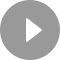
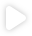

In [78]:
url = "http://www.baidu.com/s?"

kw = {
    "wd":"python"
}
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36",
}

rsp = requests.get(url,params=kw, headers=headers)
print(rsp.content)

### Post
- rsp = requests.post(url,data=data,headers=headers)

In [80]:
baseurl = "https://fanyi.baidu.com/sug"
kw = input("Input your keyword:")
data = {
    "kw":kw
}

#请求头至少数据的长度
headers = {
    "Content-Length":str(len(data))
}

rsp = requests.post(baseurl,data=data,headers=headers)

print(rsp.text)
print(rsp.json())

Input your keyword:python
{"errno":0,"data":[{"k":"python","v":"n. \u87d2; \u86ba\u86c7;"},{"k":"pythons","v":"n. \u87d2; \u86ba\u86c7;  python\u7684\u590d\u6570;"}]}
{'errno': 0, 'data': [{'k': 'python', 'v': 'n. 蟒; 蚺蛇;'}, {'k': 'pythons', 'v': 'n. 蟒; 蚺蛇;  python的复数;'}]}


### Proxy
- proxies = {

    "http":"address of proxy",
    "https":"address of proxy"
    
    }
- rsp = requests.request("get","http:xxxxxx",proxies=proxies)

### 用户验证
- 代理验证
    - 格式为 用户名:密码@代理地址:端口地址
    - proxy = {"http":"china:123456@192.168.1.123:4444"}
    - rsp = requests.get("http:xxxxxx",proxies=proxy)
- web客户端验证
    - auth = ("用户名","密码")
    - rsp = requests.get("http:xxxxxx",auth=auth)

### cookie
- rsp = requests.get("http:xxxxxx")
- 如果对方服务器传过来cookie信息
- cookiejar = rsp.cookies
- cookiedict = requests.utils.dict_from_cookiejar(cookiejar)

### session
- 模拟一次对话
- ss = requests.session()
- headers = {"User-Agent":"xxxxx"}
- data = {"name":"xxx"}
- ss.post("http:xxxxxx",data=data,headers=headers)
- rsp = ss.get("http:xxxxxx")

### ssl证书
- verify=Fales

## 页面解析和数据获取
- 结构数据:先有的结构，再读数据
    - Json文件
        - Json Path
        - 转换成Python类型
    - XML文件
        - 转换成Python类型
        - XPath
        - CSS选择器
        - 正则
- 非结构化数据:先有数据，再谈结构
    - 文本
    - 电话
    - 邮箱
    - HTML文件
        - 正则
        - XPath
        - CSS选择器

#### 正则
- match:从开头位置开始查找，一次配对
- search:任何位置查找，一次配对
- findall:全部配对，返回列表
- finditer:全部配对，返回迭代器
- split:分割字符串，返回列表
- sub:替换
- 中文unicode[\u4e00-\u9fa5]

In [96]:
import re

s = r"([\u4e00-\u9fa5]+)([\u4e00-\u9fa5]+)"
pattern = re.compile(s,re.I)#re.I忽略大小写
m = pattern.match("朋友你好 啊")

a0 = m.group(0)
a1 = m.group(1)
print(a0,a1)

b0 = m.span(0)
b1 = m.span(1)
print(b0,b1)

c = m.groups()
print(c)

朋友你好 朋友你
(0, 4) (0, 3)
('朋友你', '好')


#### XML(EXtensibleMarkuplanguage)
- http://www.w3school.com.cn/xml/index.asp

### XPath(XML Path Language)
- http://www.w3school.com.cn/xpath/index.asp
- 开发工具
    - XMLQuire
    - Chrome:Xpath Helper
    - Firefox:Xpath Checker
- 选取节点
    - nodename:选取所有子节点
    - /:从根节点开始读取
    - //:不考虑位置选取
    - .:选取当前节点
    - ..:选取父级节点
    - @:选取属性
- predicates
    - /School/Student[1]:选第一个
    - /School/Student[last()]:选最后一个
    - /School/Student[last()-1]:选倒数第二个
    - /School/Student[position()<3]:选前两个
    - //School[@score]:选带有score属性的
    - //School[@score="99]:选分是99的
    - //School[@score]/Age:选带有score属性的子节点Age
- 通配符
    - ‘*’:任何元素节点
    - @*:匹配任何属性节点
    - node():匹配任何类型节点
- 多个路径
    - //book/title | //book/author

### lxml
- HTML/XML的解析器
- http://lxml.de/index.html
- etree
    - from lxml import etree
    - 可补齐HTML
        - html = etree.HTML(text)
        - rst = etree.tostring(html)
    - 读取XML
        - xml = etree.parse("文件名")
        - rst = etree.tostring(xml,pretty_print=True)
    - 在tostring前可
        - rst = xml.xpath(//"book[@cate="sport"]/year")
        - rst = rst[0]
        - print(rst.tag,rst.text)

### CSS选择器 BeautifulSoup4
- http://beautifulsoup.readthedocs.io/zh_CN/v4.4.0/

In [1]:
from urllib import request
from bs4 import BeautifulSoup

url = "http://www.baidu.com"

rsp = request.urlopen(url)
content = rsp.read()

soup = BeautifulSoup(content,"lxml")
content = soup.prettify()

- Tag
    - 对应HTML的标签
    - soup.tag_name
    - 两个重要属性
        - name
        - attrs
- NavigableString
    - 对应内容值
- BeautifulSoup
    - 表示的是一个文档的内容
    - 一般可以用soup表示
- Comment
    - 特殊的NavigableString对象
    - 对其输出，则内容不包括注释符号

In [12]:
print(soup.link)
print(soup.link.name)
print(soup.link.attrs)

<link href="/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
link
{'rel': ['shortcut', 'icon'], 'href': '/favicon.ico', 'type': 'image/x-icon'}


In [13]:
print(soup.title)
print(soup.title.name)
print(soup.title.attrs)
print(soup.title.string)

<title>百度一下，你就知道</title>
title
{}
百度一下，你就知道


In [14]:
print(soup.name)
print(soup.attrs)

[document]
{}


#### 遍历文档对象
- contents:tag的子节点以列表的方式给出
- children:子节点以迭代器形式返回
- descendants:所有子节点
- string

In [19]:
for node in soup.head.contents:
    if node.name == "meta":
        print(node)
    if node.name == "title":
        print(node.string)

<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="always" name="referrer"/>
<meta content="#2932e1" name="theme-color"/>
<meta content="全球最大的中文搜索引擎、致力于让网民更便捷地获取信息，找到所求。百度超过千亿的中文网页数据库，可以瞬间找到相关的搜索结果。" name="description"/>
百度一下，你就知道


#### 搜素文档
- find_all(name,attrs,recursive,text,**kargs)
    - name
        - 字符串
        - 正则
        - 列表
    - text:对于tag文本值
    - **kargs:表示属性

In [22]:
import re
tags = soup.find_all(re.compile("^me"),content="always")
print(tags)

[<meta content="always" name="referrer"/>]


#### css选择器
- 通过标签名称:soup.select("title")
- 通过类名:soup.select(".comtent")
- id查找:soup.select("#name_id")
- 组合查找:soup.select("div #input_content")
- 属性查找:soup.select("img[class='photo']")
- 获取tag内容: tag.get_text

In [24]:
metas = soup.select("meta[content='always']")
metas

[<meta content="always" name="referrer"/>]

### 动态HTML介绍
- JavaScrapt
- JQuery
- Ajax
- DHTML
- Python采集动态数据
    - 从JavaScript代码入手采集
    - Python第三方库运行JavaScript,直接采集

### Selenium + PhantomJS
- Selenium:web自动化测试工具
    - 自动加载页面
    - 获取数据
    - 截屏
    - 官网: http://selenium-python.readthedocs.io/index.html
    - 使用WebDriver的API(跟页面上的元素交互)
        - 得到UI元素
            - find_element_by_id
            - find_elements_by_name
            - find_elements_by_xpath
            - find_elements_by_link_text
            - find_elements_by_partial_link_text
            - find_elements_by_css_sector
        - 基于UI元素操作的模拟
            - 单击
            - 右键
            - 拖拽
            - 输入
            - 通过导入ActionsChains类来做到
- PhantomJS
    - 基于Webkit的无界面浏览器
    - 官网: http://phantomjs.org/download.html

In [17]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

driver = webdriver.PhantomJS(r"C:/Users/lenovo/Desktop/python/phantomjs-2.1.1-windows/bin/phantomjs.exe")
driver.get("https://www.baidu.com/")
time.sleep(1)
text = driver.find_element_by_id("wrapper").text

print(text)

D:\anaconda3\lib\site-packages\selenium\webdriver\phantomjs\webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


新闻hao123地图视频贴吧学术更多
设置登录
百度热榜
换一换
16000元离职赔偿金全是硬币
4TikTok说已向美政府提交解决方案
2中国电视好演员入围名单公布
5敦煌陷阱公厕涉事嫌疑人已被抓获
3云南瑞丽将三天完成全员核酸检测
621岁男子因琐事弑母杀弟
设为首页关于百度About Baidu百度营销使用百度前必读意见反馈帮助中心


In [18]:
driver.save_screenshot("index.png")

True

In [19]:
driver.find_element_by_id("kw").send_keys(u"大熊猫")
driver.find_element_by_id("su").click()
time.sleep(3)
driver.save_screenshot("大熊猫.png")

True

In [20]:
print(driver.get_cookies())

[{'domain': 'www.baidu.com', 'expires': '周二, 15 9月 2020 11:24:24 GMT', 'expiry': 1600169064, 'httponly': False, 'name': 'H_PS_645EC', 'path': '/', 'secure': False, 'value': '8365LYQ7cUB3k44EMWffNVFXvSidiRbu3nNyfFS3Q%2B%2BBeNtH06raSrPWdHo'}, {'domain': '.baidu.com', 'httponly': False, 'name': 'H_PS_PSSID', 'path': '/', 'secure': False, 'value': '7541_32617_1449_7544_7612_32672_7624_32116_7565_32581'}, {'domain': 'www.baidu.com', 'expires': '周五, 25 9月 2020 10:41:08 GMT', 'expiry': 1601030468, 'httponly': False, 'name': 'BD_UPN', 'path': '/', 'secure': False, 'value': '14314454'}, {'domain': '.baidu.com', 'expires': '周六, 07 9月 2052 10:41:08 GMT', 'expiry': 2609318468, 'httponly': False, 'name': 'BIDUPSID', 'path': '/', 'secure': False, 'value': '73CE3D92FF3B0BFEE830DD680762F2A1'}, {'domain': '.baidu.com', 'expires': '周三, 15 9月 2021 10:41:07 GMT', 'expiry': 1631702467, 'httponly': False, 'name': 'BAIDUID', 'path': '/', 'secure': False, 'value': '964960BEF230058564F1D4E33BE22202:FG=1'}, {'d

In [21]:
driver.find_element_by_id("kw").send_keys(Keys.CONTROL,"a")
driver.find_element_by_id("kw").send_keys(Keys.CONTROL,"x")
driver.find_element_by_id("kw").send_keys(u"航空母舰")
driver.save_screenshot("改变.png")

True

In [22]:
driver.find_element_by_id("su").send_keys(Keys.ENTER)
time.sleep(3)
driver.save_screenshot("航空母舰.png")

True

In [23]:
driver.find_element_by_id("kw").clear()
driver.save_screenshot("清空.png")

True

In [24]:
driver.quit()

#### 图片识别

In [1]:
from PIL import Image
import pytesseract
 
text = pytesseract.image_to_string(Image.open(r'C:\Users\lenovo\Desktop\python\1-26.jpg'))
print(text)

Python3WebSpider




#### 爬虫框架
- pyspider
- crawley
- scrapy
    - ScrapyEngine:神经中枢
    - Scheduler调度器:引擎发送request请求，调度器处理，然后交换引擎
    - Downloader下载器:把引擎发来的requests发出请求，得到response
    - Spider爬虫:负责把下载器得到的网页/结果进行分解成数据+链接
    - ItemPipeLine管道:详细处理Item
    - DownloaderMiddleware下载中间件:自定义下载功能扩展组件
    - SpiderMiddleware爬虫中间件:对spider进行功能扩展
    - https://doc.scrapy.org/en/latest/
    - http://scrapy-chs.readthedocs.io/zh_CN/latest/index.html
- 流程
    - 新建项目:scrapy startproject xxx
    - 明确产出:item.py
    - 制作爬虫:spider/xxspider.py
    - 存储内容:pipelines.py

#### ItemPipeline
- 爬虫提出数据存入item后，item中保存的数据需要进一步处理，如清洗，去重，存储等
- pipeline需要处理process_item函数
- process_item:
    - spider提出来的item作为参数传入，同时传入的还有spider
    - 必须实现
    - 必须返回一个item对象
- \__init__:进行一些必要的参数初始化
- open_spider(spider):spider对象被开启时调用
- close_spider(spider):spider对象被关闭时调用

#### Spider
- 对应的是文件夹spiders下的文件
- \__init__:初始化爬虫名称，start_urls列表
- start_requests:生成Requests对象交给Scrapy下载并返回response
- parse:根据返回的response解析出相应item，item自动进入pipline，如有需要，解析出url自动交给requests模块，一直循环
- start_request:只能调用一次，读取start_urls内容并启动循环
- name:设置爬虫名
- start_urls:设置第一批爬取的url
- allow_domains:spider允许爬取的域名列表
- log:日志记录
    
#### 中间件(DownloaderMiddlewares)
- 引擎和下载器中间的组件
- 可以有很多，按顺序加载执行
- 作用是对发出的请求和返回的结果进行预处理
- 在middlewares文件中
- 需要在settings中设置以使生效
- 必须是scrapy.contrib.downloadermiddleware.DownloaderMiddleware的子类
- 一般一个中间件一项功能
- 必须实现以下一个或多个方法
    - process_request(self,request,spider):
        - 在request通过时被调用
        - 必须返回None或Response或Request或raise IgnoreRequest
        - None:scrapy继续处理该request
        - Request:scrapy停止调用process_request并重新调度返回的request
        - Response:scrapy不会调用其他process_request或者process_exception,直接将该response作为结果返回，同时会调用process_response函数
    - process_response(self,request,response,spider):
        - 与上相似
        - 每次返回结果时自动调用

#### 设置settings的相关代码

    USER_AGENTS = [
        "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/30.0.1599.101 Safari/537.36",
        "Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7.0; rv:11.0) like Gecko"
    ]

    PROXIES = [
        {"ip_port":"219.239.142.253:3128","user_passwd":None},
        {"ip_port":"183.166.137.90:8888","user_passwd":None},
        {"ip_port":"182.108.243.104:9000","user_passwd":None},
        {"ip_port":"222.249.238.138:8080","user_passwd":None}
    ]

In [5]:
import random
import base64
#settings 设置文件中导入
from settings import USER_AGENTS
from settings import PROXIES

#随机的User-Agent
class RandomUserAgent(object):
    def process_request(self,request,spider):
        useragent = random.choice(USER_AGENTS)
        request.headers.setdefault("User-Agent",useragent)
        
#代理中间件
class RandomProxy(object):
    def process_request(self,request,spider):
        proxy = random.choice(PROXIES)
        if proxy["user_passwd"] is None:
            request.meta["proxy"] = "http://"+proxy["ip_port"]
        else:
            #对密码进行base64编码转换
            base64_userpasswd = base64.b64encode(proxy["user_passwd"])
            request.headers["Proxy-Authorization"] = "Basic" + base64_userpasswd
            request.meta["proxy"] = "http://" + proxy["ip_port"]

#### 去重
- 为了防止死循环
- 在spide中的parse函数，返回Request的时候加上dont_filter=False参数
```python
class myspider(scrapy.Spider):
    def parse(....):
        ....
        yield scrapy.Request(url=url,callback=self.parse,dont_filter=False)```

#### 在scrapy使用selenium
- 可以放入中间件中的process_request函数中
- 完成后返回Response
    ```python
    class MyMiddleWare(object):
        def process_request(....):
            
            driver = webdriver.Chrome()
            html = driver.page_source
            driver.quit()
            
            return HtmlResponse(url=request.url,encoding="utf-8",body=html,request=request)
    ```

#### scrapy-shell
- https://segmentfault.com/a/1190000013199636?utm_source=tag-newest
- scrapy shell "url:xxxx"
- response.body:网页代码
- response.headers:http的头信息
- response.xpath():允许xpath语法
- response.css():允许css语法
- response.selector.re():允许正则语法
- response.selector():允许使用选择器
- response.selector.extract:把节点内容以Unicode形式返回

#### 分布式爬虫
- Redis(最初保存在内存)
    - 内存数据库
    - 同时可以落地保存到硬盘
    - 可以去重
    - dict,set,list的合集
    - 对保存的内容进行生命周期的控制
    - http://scrapy-redis.readthedocs.io/en/stable/
- 在settings设置队列是远程的
- 内容保存数据库
    - MongoDB
    - Mysql